In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
%config InlineBackend.figure = 'retina'

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={'v1':'label','v2':'text'})

In [5]:
data.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
#count observation in each label
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
#convert the label to numerical data
data['label_num'] = data.label.map({'ham':0, 'spam':1})

In [8]:
data.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'],data['label'], test_size=0.2, random_state=10)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457,), (1115,), (4457,), (1115,))

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [14]:
vect.get_feature_names()[0:20], vect.get_feature_names()[-20:]

(['00',
  '000',
  '000pes',
  '008704050406',
  '0089',
  '0121',
  '01223585236',
  '01223585334',
  '0125698789',
  '02',
  '0207',
  '02072069400',
  '02073162414',
  '02085076972',
  '021',
  '03',
  '04',
  '0430',
  '05',
  '050703'],
 ['zyada',
  'åð',
  'åòharry',
  'åòit',
  'åômorrow',
  'åôrents',
  'ì_',
  'ì¼1',
  'ìä',
  'ìï',
  'ó_',
  'û_',
  'û_thanks',
  'ûªm',
  'ûªt',
  'ûªve',
  'ûï',
  'ûïharry',
  'ûò',
  'ûówell'])

In [27]:
X_train_df = vect.transform(X_train)

In [16]:
X_test_df = vect.transform(X_test)

In [17]:
type(X_test_df)

scipy.sparse.csr.csr_matrix

In [18]:
#visualization
ham_words = ''
spam_words = ''
spam = data[data.label_num == 1]
ham = data[data.label_num == 0]

In [19]:
import nltk
from nltk.corpus import stopwords

In [20]:
for val in spam.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if words not in stopwords.words('english')]
    for words in tokens:
        spam_words = spam_words + words + ' '
    
for val in ham.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if words not in stopwords.words('english')]
    for words in tokens:
        ham_words = ham_words + words + ' '

In [22]:
from wordcloud import WordCloud

In [23]:
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

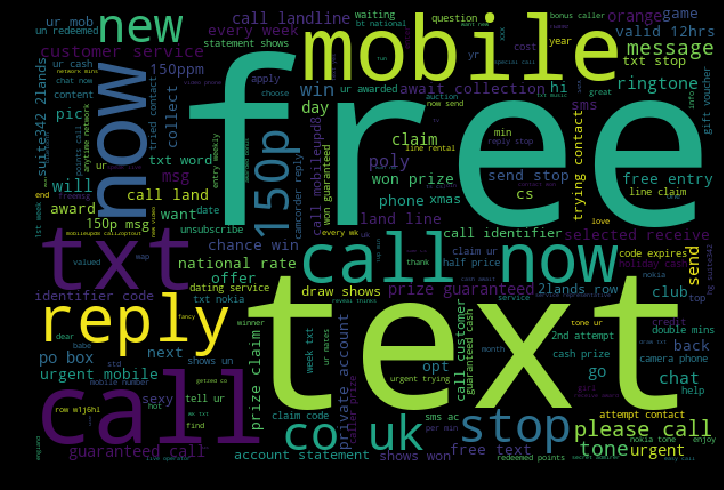

In [24]:
#spam word cloud
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

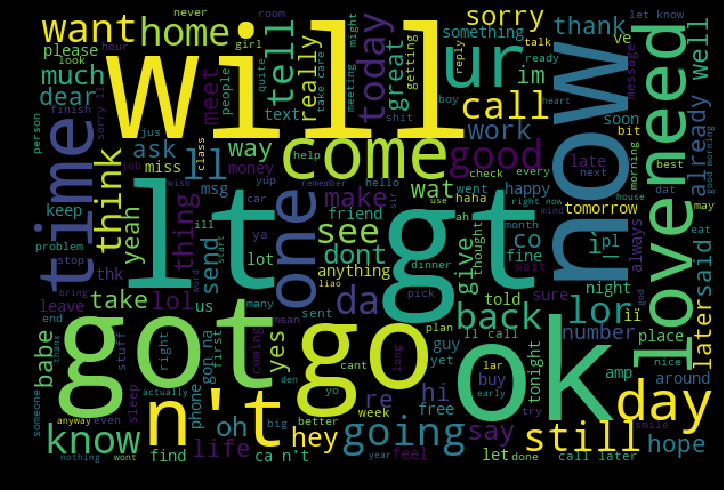

In [25]:
#ham word cloud
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [28]:
#Machine Learning Models
#1. Multinomial Naive Bayes

prediction = dict()
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
prediction['MUltinomialNB'] = model.predict(X_test_df)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
accuracy_score(y_test, prediction['MUltinomialNB'])

0.9883408071748879

In [32]:
#2. Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_df, y_train)
prediction['LogistiRegression'] = model.predict(X_test_df)
accuracy_score(y_test,prediction['LogistiRegression'])

0.9802690582959641

In [33]:
#K-NN Classifier

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_df, y_train)
prediction['KNN'] = model.predict(X_test_df)
accuracy_score(y_test,prediction['KNN'])

0.9121076233183857

In [34]:
#Ensemble Classifier - RandomForest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_df, y_train)
prediction['RF'] = model.predict(X_test_df)
accuracy_score(y_test,prediction['RF'])

0.9730941704035875

In [35]:
#Ensemble Classifier - AdaBoost

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_df, y_train)
prediction['ADA'] = model.predict(X_test_df)
accuracy_score(y_test,prediction['ADA'])

0.967713004484305

In [36]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_df, y_train)
prediction['SVC'] = model.predict(X_test_df)
accuracy_score(y_test,prediction['SVC'])

0.8654708520179372

In [38]:
#Parameter Tuning with Gridsearch CV
from sklearn.model_selection import GridSearchCV

In [40]:
k_range = np.arange(1,30)
k_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [41]:
param_grid = dict(n_neighbors=k_range)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}

In [42]:
model = KNeighborsClassifier()
grid = GridSearchCV(model, param_grid)
grid.fit(X_train_df, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [44]:
grid.best_params_

{'n_neighbors': 1}

In [45]:
grid.best_score_

0.9461521202602647

In [47]:
grid.score

<bound method BaseSearchCV.score of GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

In [51]:
#model Evaluation 
print(classification_report(y_test, prediction['MUltinomialNB'], target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       965
        Spam       0.97      0.95      0.96       150

   micro avg       0.99      0.99      0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Text(0.5, 15.0, 'predicted Label')

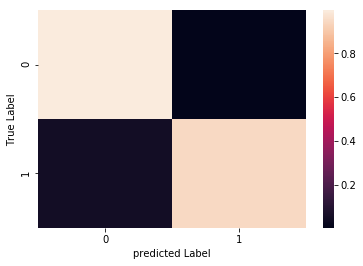

In [52]:
conf_mat = confusion_matrix(y_test, prediction['MUltinomialNB'])
conf_mat_norm = conf_mat.astype('float')/conf_mat.sum(axis=1)[:, np.newaxis]

sns.heatmap(conf_mat_norm)
plt.ylabel('True Label')
plt.xlabel('predicted Label')

In [53]:
conf_mat

array([[960,   5],
       [  8, 142]], dtype=int64)

In [55]:
pd.set_option('display.max_colwidth',-1) # increase the pandas df disply col width

In [56]:
#misclassified as SPAM

X_test[y_test<prediction['MUltinomialNB']]

573     Waiting for your call.                                                                                                      
4727    I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
5475    Dhoni have luck to win some big title.so we will win:)                                                                      
4860    Nokia phone is lovly..                                                                                                      
1259    We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us                           
Name: text, dtype: object

In [57]:
#MIsclassified as Ham
X_test[y_test>prediction['MUltinomialNB']]

5035    You won't believe it but it's true. It's Incredible Txts! Reply G now to learn truly amazing things that will blow your mind. From O2FWD only 18p/txt       
2574    Your next amazing xxx PICSFREE1 video will be sent to you enjoy! If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.   
3130    LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323.
68      Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"                                                                            
2662    Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?                          
4211    Missed call alert. These numbers called but left no message. 07008009200                                                                                    
3572    Yo